In [4]:
import pandas as pd

In [5]:
df = pd.read_parquet('c:/fomo_data/model_data_1.parquet')

In [6]:
df.head()

,locationid,ridership,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2.0,1.0,2022-02-06 15:00:00,-5.6,0.0,0.0,11.0,0.0,0.0,35.0,6.600000,331.0
1,2.0,1.0,2022-02-16 23:00:00,5.4,0.0,0.0,29.0,0.0,0.0,97.0,12.100000,280.0
2,2.0,1.0,2022-02-23 08:00:00,13.5,0.0,0.0,44.0,8.0,11.0,100.0,16.299999,227.0
3,2.0,4.0,2022-02-23 19:00:00,17.5,0.0,0.0,22.0,5.0,2.0,54.0,21.600000,184.0
4,2.0,1.0,2022-03-22 10:00:00,7.4,0.0,0.0,20.0,0.0,30.0,8.0,10.800000,127.0


In [7]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek
df['month'] = df['time'].dt.month
df['is_weekend'] = df['day_of_week'] >= 5

# Drop the original time column
df = df.drop(columns=['time'])

# Handle missing values (if any)
df = df.fillna(df.mean())

# Features and target variable
X = df.drop(columns=['ridership'])
y = df['ridership']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1456824.1631958438


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 1456824.1631958438
Root Mean Squared Error (RMSE): 1206.9897113048826
R-squared (R²): 0.7862854214296133


c:\Users\Kevin\anaconda3\envs\softwareeng\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


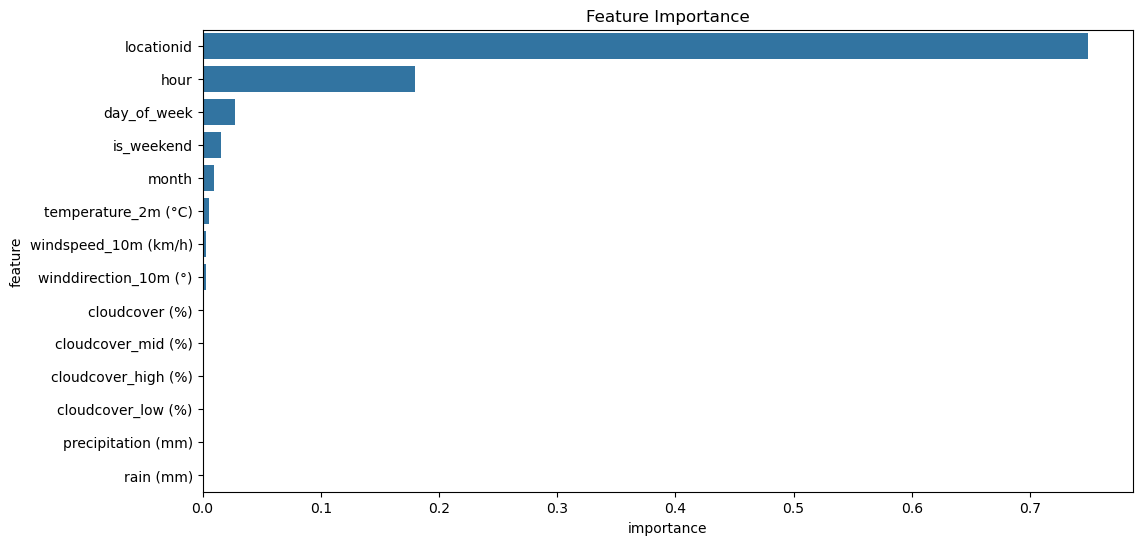

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)